## 1. Clustering - K means ##

The K means algorithm creates K sets of points each of them represented by their centroids. The generic centroid of each cluster is the mean of the samples of the points associated to that cluster in order to minimize the intra cluster distance.

The centroids are chosen to minimize the intra cluster distortion.

The training phase of the K-means algorithm is called the  ** Lloyds algorithm** and is a variant of the ** Expectation-Maximization ** algorithm as the first step creates a function for the expectation of a score, and the maximization step computes the parameters that maximize the score. 

These two steps continue until convergence(points are stable in their cluster) or until the algorithm reaches a preset number of iterations. The more the number of iterations, the better the result.

In [1]:
# All necessary imports
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
import matplotlib.cm as cm
import copy
import tempfile
import os

## 1.1 Testing on a dummy dataset ##

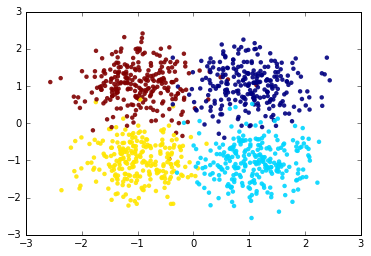

In [2]:
'''
Testing on a dummy dataset with 1000 points
'''
from sklearn.datasets.samples_generator import make_blobs

# The points are centered in four locations symmetric with respect to the origin
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]

X, y = make_blobs(n_samples = 1000, 
                  centers = centers, 
                  cluster_std = 0.5, 
                  random_state=101)
# Scatter plot
plt.scatter(X[:,0], 
            X[:,1], 
            c = y, # coloring based on the centroid of each cluster
            edgecolors='none', 
            alpha=0.9)
plt.show()

## 1.2 Running K-means and investigating each step ##

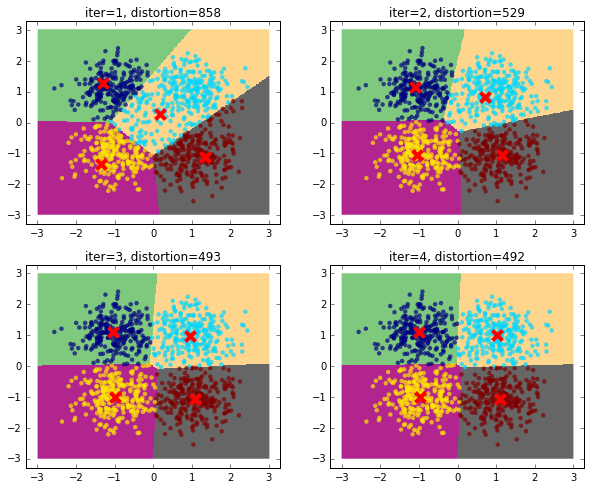

In [3]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

from sklearn.cluster import KMeans

'''
At each iterations we will plot:

- The points and their associated cluster
- The centroid
- Distortion(gets lower with each iteration)
- Decision boundary(Voronoi cells)
'''
for n_iter in range(1, 5):

    cls = KMeans(n_clusters = 4, 
                 max_iter = n_iter, 
                 n_init = 1,
                 init='random', 
                 random_state=101)
    cls.fit(X)
    
    
    # Plot the voronoi cells or the decision boundaries   
    plt.subplot(2, 2, n_iter)
    h=0.02
    xx, yy = np.meshgrid(np.arange(-3, 3, h), 
                         np.arange(-3, 3, h))
    
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.imshow(Z, 
               interpolation ='nearest', 
               cmap = plt.cm.Accent,
               extent = (xx.min(), xx.max(), yy.min(), yy.max()),
               aspect = 'auto', 
               origin='lower')

    
    plt.scatter(X[:,0], 
                X[:,1], 
                c = cls.labels_, 
                edgecolors = 'none', 
                alpha = 0.7)
    
    plt.scatter(cls.cluster_centers_[:,0], 
                cls.cluster_centers_[:,1], 
                marker='x', 
                color='r', 
                s=100, 
                linewidths=4)
    
    plt.title("iter=%s, distortion=%s" %(n_iter, int(cls.inertia_)))

plt.show()

## 2: Initialization methods ##

Finding the global minimum of the distortion in K-means is a NP hard problem. The algorithm has a tendency to converge on local minimas especially if the number of dimensions is high. Some counter measures are:

* Run the algorithm multiple times with different starting points. That is set the `n_init` value for the number of iterations. If there are multiple cores, the process can be run in parallel using `n_jobs`

* Use the kmeans++ initialization that selects points that are far from each other to ensure that the centroids are able to form clusters in uniform subspaces of the space. 

## 3: K-means assumptions ##

* Each cluster has a hyper-spherical shape, that is, not an elongated shape like an arrow.
* All clusters have same variance internally.
* Cluster sizes are comparable.

## 3.1 Running K-means when the assumptions are not met ##

### 3.1.a When we have elongated sets of data. ###

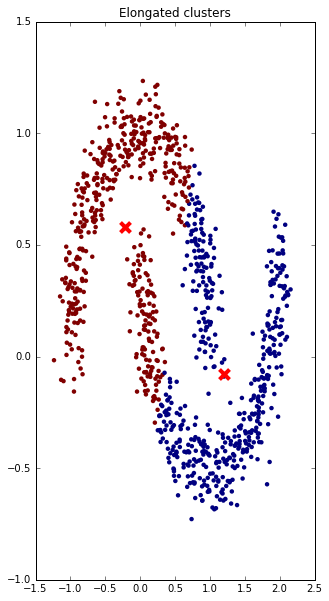

In [5]:
pylab.rcParams['figure.figsize'] = (5.0, 10.0)
from sklearn.datasets import make_moons

'''
Case 1:

When we have Oblong/elongated sets of data.
'''

# Create the dataset
X, _ = make_moons(n_samples=1000, 
                  noise=0.1, 
                  random_state=101)

# Define the classifier
cls = KMeans(n_clusters=2, 
             random_state=101)

# Predictions
y_pred = cls.fit_predict(X)

# Plotting the predictions
# plt.subplot(3, 1, 1)
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=y_pred, 
            edgecolors='none')


plt.scatter(cls.cluster_centers_[:,0], 
            cls.cluster_centers_[:,1], 
            marker='x', 
            color='r', 
            s=100, 
            linewidths=4)

plt.title("Elongated clusters")

plt.show()

### 3.1.b When the variance in the clusters is not the same. ###

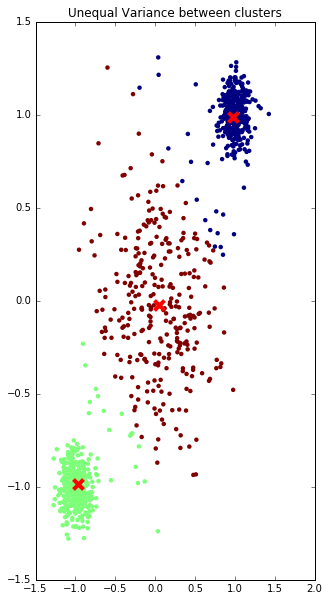

In [6]:
'''
Variance in the clusters are not even.
'''

centers = [[-1, -1], [0, 0], [1, 1]]

# Create the dataset
X, _ = make_blobs(n_samples=1000, 
                  cluster_std=[0.1, 0.4, 0.1],
                  centers = centers, 
                  random_state=101)

# Define the classifier.
cls = KMeans(n_clusters=3, random_state=101)

# Make predictions
y_pred = cls.fit_predict(X)

# Plot the predictions
# plt.subplot(3, 1, 2)
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = y_pred, 
            edgecolors='none')

plt.scatter(cls.cluster_centers_[:,0], 
            cls.cluster_centers_[:,1], 
            marker='x', 
            color='r', 
            s=100, 
            linewidths=4)

plt.title("Unequal Variance between clusters")

plt.show()

### 3.1.c When the cluster sizes are not the same ###

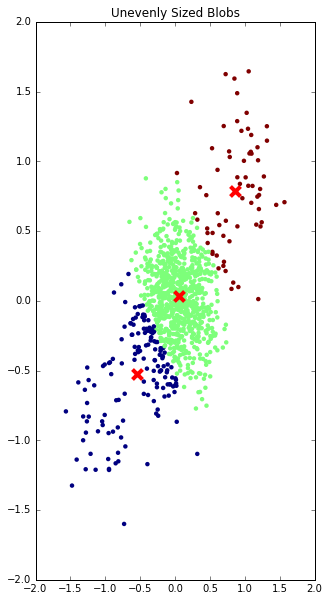

In [7]:
'''
Unevenly sized blobs of data.
'''
centers = [[-1, -1], [1, 1]]
centers.extend([[0,0]]*20)

# Create the datapoints
X, _ = make_blobs(n_samples=1000, 
                  centers=centers, 
                  cluster_std=0.28, 
                  random_state=101)

# Define the classifier
cls = KMeans(n_clusters=3, 
             random_state=101)

# Make predictions 
y_pred = cls.fit_predict(X)

# plt.subplot(3, 1, 3)

# Plot the predcitions
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=y_pred, 
            edgecolors='none')


plt.scatter(cls.cluster_centers_[:,0], 
            cls.cluster_centers_[:,1], 
            marker='x', 
            color='r', 
            s=100, 
            linewidths=4)

plt.title("Unevenly Sized Blobs")
plt.show()

## 4: Selection of the best K - knowing the number of clusters beforehand. ##

There are 3 measures which can help us here:

* Homogeneity(precision): It gives a measuer of how many of the predicted clusters contain just points of one class. It's a measure based on entropy and is the cluster equivalent of precision.

* Completeness: This is similar to precision and recall, it gives a measure about how much all members of a class are assigned to the same cluster.

* V-measure: This is the harmonic mean of the Homogeneity and Completeness scores.

## 4.1: Find the best K using Homogeneity, Completeness and V-measure ##

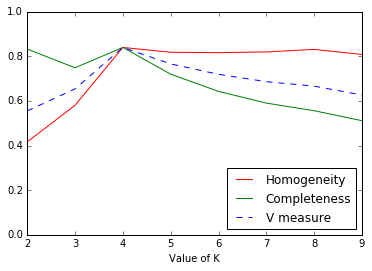

In [9]:
pylab.rcParams['figure.figsize'] = (6.0, 4.0)
from sklearn.metrics import homogeneity_completeness_v_measure

# Create the datapoint
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]

X, y = make_blobs(n_samples=1000, 
                  centers=centers, 
                  cluster_std=0.5, 
                  random_state=101)

# Range of K values we are testing for the above datapoints
Ks = range(2, 10)

# List to keep track of the scores
HCVs = []

# For each K, find scores
for K in Ks:
    # Make predictions
    y_pred = KMeans(n_clusters = K, random_state=101).fit_predict(X)
    # Find score
    HCVs.append(homogeneity_completeness_v_measure(y, y_pred))

plt.plot(Ks, [el[0] for el in HCVs], 'r', label='Homogeneity')
plt.plot(Ks, [el[1] for el in HCVs], 'g', label='Completeness')
plt.plot(Ks, [el[2] for el in HCVs], 'b--', label='V measure')
plt.ylim([0, 1])
plt.xlabel("Value of K")
plt.legend(loc=4)
plt.show()

Clearly, at K = 4 we get our best scores.

## 4.2: Find the best K using the Elbow method ##

We plot the distortion of many K-means models with different Ks, then select the one in which increasing K doesn't introduce much lower distortion in the solution. Our objective is to find the K with the least distortion. 

Distortion is found using `cls.inertia_` where `cls` is our KMeans classifier.

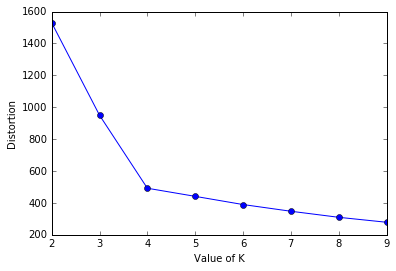

In [10]:
# Range of K values
Ks = range(2, 10)

# List to keep track of distortion values
Ds = []

for K in Ks:
    cls = KMeans(n_clusters = K, 
                 random_state=101)
    cls.fit(X)
    # Append distortion score
    Ds.append(cls.inertia_)

plt.plot(Ks, Ds, 'o-')
plt.xlabel("Value of K")
plt.ylabel("Distortion")
plt.show()

The distortion drops greatly until K = 4. Therefore K = 4 is the value we are looking for.

## 4.3: Find the best K using the Silhouette score ##

The Silhouette score measures how close(similar) an observation is to its assigned cluster and how loosely(dissimilar) it is matched to the nearby clusters.

A score of 1 means that all the data is matched to the right cluster.

A score of -1  indicates a completely wrong cluster result.


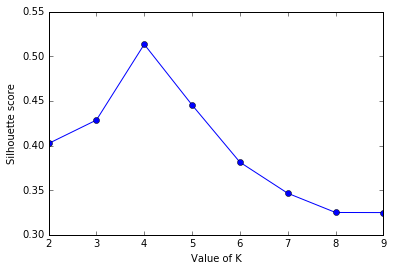

In [11]:
from sklearn.metrics import silhouette_score

# Range of K values
Ks = range(2, 10)

# Silhouette score list
Ds = []

# Iterate for each K
for K in Ks:
    cls = KMeans(n_clusters=K, 
                 random_state=101)
    
    # Append score for each K
    Ds.append(silhouette_score(X, cls.fit_predict(X)))

plt.plot(Ks, Ds, 'o-')
plt.xlabel("Value of K")
plt.ylabel("Silhouette score")
plt.show()

We get the highest score of K = 4.

## 5: Scalable K means. ##

We will be using the UCI dataset on the US Census 1990 data. It has 2.5 million observations and 68 categorical(number attributed) features.

## 5.1 Download the US Census 1990 dataset ##

In [12]:
import urllib
import os.path

# Data description: https://archive.ics.uci.edu/ml/machine-learning-databases/census1990-mld/USCensus1990-desc.html
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/census1990-mld/USCensus1990.data.txt"
census_csv_file = "./USCensus1990.data.txt"

import os.path

# If path exists
if not os.path.exists(census_csv_file):
    testfile = urllib.URLopener()
    testfile.retrieve(url, census_csv_file)
    
# If path does not exist
if not os.path.exists(census_csv_file):
    testfile = urllib.URLopener()
    testfile.retrieve(url, census_csv_file)

## 5.2 Tests to check time needed to train K-means learner ##

We will perform tests to check for times needed when K = 4,8,12 and with a dataset of 20k,200k,0.5M observations.

Dataset size: 20000
K: 4
1 loop, best of 1: 453 ms per loop
K: 8
1 loop, best of 1: 1.2 s per loop
K: 12
1 loop, best of 1: 1.48 s per loop
Dataset size: 200000
K: 4
1 loop, best of 1: 6.11 s per loop
K: 8
1 loop, best of 1: 9.71 s per loop
K: 12
1 loop, best of 1: 17.5 s per loop
Dataset size: 500000
K: 4
1 loop, best of 1: 12.6 s per loop
K: 8
1 loop, best of 1: 36 s per loop
K: 12
1 loop, best of 1: 50.4 s per loop


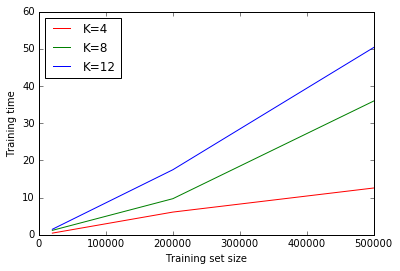

In [13]:
# Read the dataset in chuncks of 0.5M
# The first attribute is a caseid and should be ignored during analysis as mentioned in the UCI website.
piece_of_dataset = pd.read_csv(census_csv_file, iterator=True) \
                     .get_chunk(500000) \
                     .drop('caseid', axis=1) \
                     .as_matrix()

# Time tracked for when K = 4,8,12
time_results = {4: [], 8:[], 12:[]}

# Testing for 3 different dataset sizes
dataset_sizes = [20000, 200000, 500000]

# For each dataset size
for dataset_size in dataset_sizes:
    print "Dataset size:", dataset_size
    
    # Define training data
    X = piece_of_dataset[:dataset_size,:]
        
        # For each K
    for K in [4, 8, 12]:
        print "K:", K
        cls = KMeans(K, 
                     random_state=101)
        
        # Time to train classifier on training data
        timeit = %timeit -o -n1 -r1 cls.fit(X)
        time_results[K].append(timeit.best)

# Time for when K = 4 plotted in red
plt.plot(dataset_sizes, 
         time_results[4], 
         'r', 
         label='K=4')

# Time for when K = 8 plotted in green
plt.plot(dataset_sizes, 
         time_results[8], 
         'g', 
         label='K=8')

# Time for when K = 12 plotted in blue
plt.plot(dataset_sizes, 
         time_results[12], 
         'b', 
         label='K=12')

plt.xlabel("Training set size")
plt.ylabel("Training time")
plt.legend(loc=0)
plt.show()

The more the number of clusters, the training time increases linearly. 

## 5.3 Using Mini Batch K-means ##

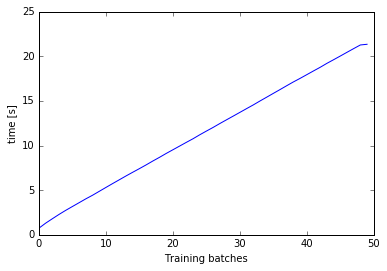

In [14]:
'''
Testing Mini Batch K-means when K = 12, which was the slowest case in our previous step.
'''
from sklearn.cluster import MiniBatchKMeans
import time

# Define the classifier
cls = MiniBatchKMeans(12, 
                      batch_size=1000, 
                      random_state=101)

# List to keep track of time
ts = []

tik = time.time()

# Read the data in chunks of 50,000
for chunk in pd.read_csv(census_csv_file, chunksize=50000):
    # Fit the data
    cls.partial_fit(chunk.drop('caseid', axis=1))
    ts.append(time.time()-tik)
        
plt.plot(range(len(ts)), ts)
plt.xlabel('Training batches')
plt.ylabel('time [s]')

plt.show()

Training on the full 2.5M observation dataset takes about 23 seconds when done in chunks of 50,000 rows.

K= 4
K= 5
K= 6
K= 7
K= 8
K= 9
K= 10
K= 11
K= 12


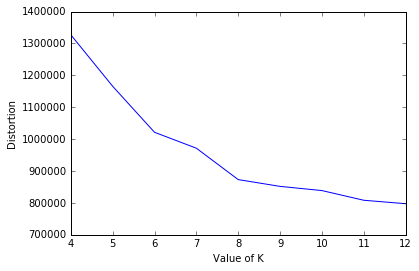

In [15]:
'''
Repeating test run to find best K using K-means minibatch.

We find the best K using the Elbow method of distortion.
'''

# Range of K values
Ks = list(range(4, 13))

# Distortion score like
ds = []

for K in Ks:
    print "K=", K
    cls = MiniBatchKMeans(K, 
                          batch_size=1000, 
                          random_state=101)
    
    # Read the data in chunks
    for chunk in pd.read_csv(census_csv_file, chunksize=50000):
        cls.partial_fit(chunk.drop('caseid', axis=1))
    
    # Find distortion scores
    ds.append(cls.inertia_)

plt.plot(Ks, ds)
plt.xlabel('Value of K')
plt.ylabel('Distortion')

plt.show()

The best K value is at 8. Therefore the 1990 census data can be split into 8 different clusters.